Enter the value for anxiety_level: 23
Enter the value for self_esteem: 12
Enter the value for mental_health_history: 3
Enter the value for depression: 24
Enter the value for headache: 3
Enter the value for blood_pressure: 4
Enter the value for sleep_quality: 2
Enter the value for breathing_problem: 4
Enter the value for noise_level: 5
Enter the value for living_conditions: 1
Enter the value for safety: 3
Enter the value for basic_needs: 5
Enter the value for future_career_concerns: 2
Enter the value for social_support: 5


C:\Users\deepi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The user input belongs to Cluster: low issue


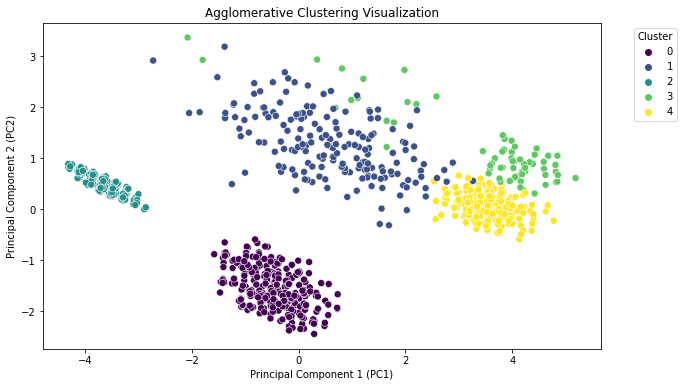

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = r'C:\Users\deepi\Desktop\mental health\student.csv'
df = pd.read_csv(csv_file_path)

def map_values(value):
    if 1 <= value <= 5:
        return 1
    elif 6 <= value <= 10:
        return 2
    elif 11 <= value <= 15:
        return 3
    elif 16 <= value <= 20:
        return 4
    elif 21 <= value <= 25:
        return 5
    else:
        return value

# Apply mapping for anxiety_level and depression
df['anxiety_level'] = df['anxiety_level'].apply(map_values)
df['depression'] = df['depression'].apply(map_values)

# Apply mapping for self_esteem (range 1 to 30)
df['self_esteem'] = df['self_esteem'].apply(lambda x: min(5, max(1, (x-1) // 5 + 1)))

# Assuming you have your data loaded into a DataFrame 'data'
# Features_for_clustering should contain the relevant features for clustering
features_for_clustering = df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
                                'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety',
                                'basic_needs', 'future_career_concerns', 'social_support']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')  # You may need to adjust the number of clusters
cluster_assignments = agglomerative.fit_predict(scaled_features)

# Input features from the user
user_input = []
for feature in features_for_clustering.columns:
    value = float(input(f"Enter the value for {feature}: "))
    user_input.append(value)

# Repeat the user input to create multiple samples
num_samples = 10  # Adjust as needed
user_inputs = np.tile(user_input, (num_samples, 1))

# Scale the user input
scaled_user_inputs = scaler.transform(user_inputs)

# Predict the cluster for the user input using fit_predict
user_clusters = agglomerative.fit_predict(scaled_user_inputs)

# Map cluster numbers to cluster names
cluster_names = {0: 'low issue', 1: 'high issue', 2: 'Mid Low', 3: 'Mid High', 4: 'Medium Issue'}

# Display the result
user_cluster_name = cluster_names[user_clusters[0]]
print(f"The user input belongs to Cluster: {user_cluster_name}")

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_visualization['Cluster'] = cluster_assignments

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='viridis', s=50)
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
